In [70]:
import pandas as pd

# https://github.com/tylerrussin/Fish-Dimensions-Regression-Analysis/blob/master/assets/data/Fish.csv
initial_df = pd.read_csv("datasets/pr5/fish.csv")
df = initial_df

print(df.head())
print()
print(df['Species'].value_counts())
print()
print(df['Species'].unique())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


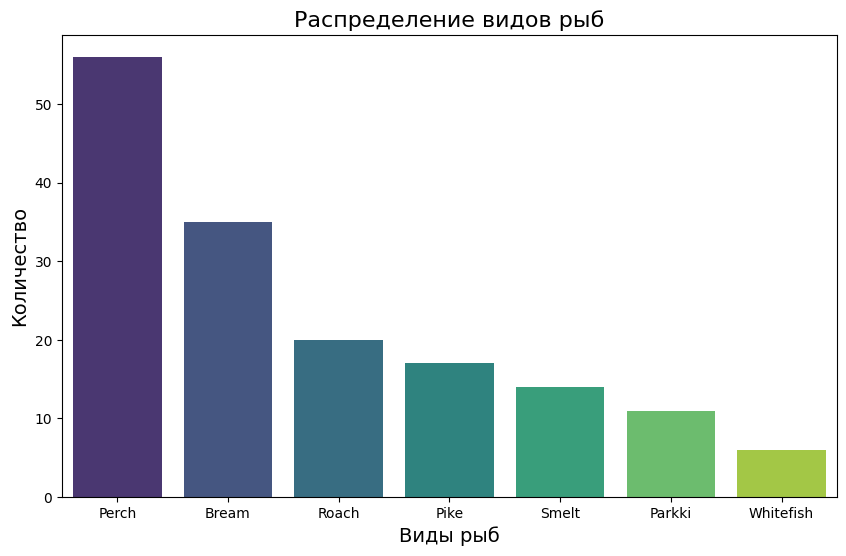

In [139]:
# 2.Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.
import matplotlib.pyplot as plt
import seaborn as sns

species_counts = df['Species'].value_counts().reset_index()
species_counts.columns = ['Species', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=species_counts, x='Species', y='Count', hue='Species', palette="viridis", dodge=False)

plt.title('Распределение видов рыб', fontsize=16)
plt.xlabel('Виды рыб', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()
# Дисбаланс классов - может понадобиться балансировка классов (undersampling/oversampling/SMOTE)
# или изменение параметров модели (задание большего веса менее преобладающим классам)

In [141]:
# 3. Разбить выборку на тренировочную и тестовую.
# Тренировочная для обучения модели,
# тестовая для проверки ее качества.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# преобразуем колонку 'Species' в числовой формат (label encoding)
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])
# подготавливаем данные
y = df['Species_encoded']
X = df.drop(columns=['Species', 'Species_encoded'])

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=55)

unique_classes = np.unique(y_test)

class_names = label_encoder.inverse_transform(unique_classes)

print(*y_predict)
print(*y_test)

print(classification_report(y_test, y_predict))

2 0 2 4 2 3 2 0 5 3 2 2 0 0 0 1 1 0 2 5 0 3 2 2 2 2 3 2 2 0 4 3
2 0 2 4 2 3 2 0 5 3 2 2 0 0 0 1 1 0 2 5 0 3 2 2 2 2 3 2 2 0 4 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [142]:
# 4. Применить алгоритмы классификации: логистическая регрессия, SVM,
# KNN. Построить матрицу ошибок по результатам работы моделей
# (использовать confusion_matrix из sklearn.metrics).

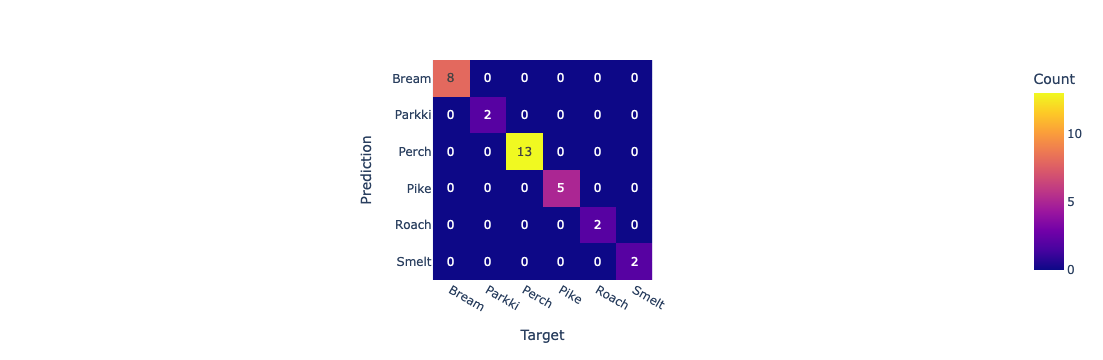

In [143]:
# 4. Логистическая регрессия
import plotly.express as px
from sklearn.metrics import confusion_matrix

# производим тесты на основе обученной модели
# solver='lbfgs' окажется «глупее»
model = LogisticRegression(solver='liblinear', max_iter=100)
# попробовал другой solver, потому что стандартный solver выдавал ошибку оптимизации (что-то связанное с итерациями)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_logreg_predict = y_predict

# визуализируем
cm = confusion_matrix(y_test, y_predict)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(
    cm,
    text_auto=True,
    labels=dict(x="Predicted Class", y="True Class", color="Count"),
    x=class_names,
    y=class_names
)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
# построена матрица ошибок – обученная модель предсказала правильно все объекты

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



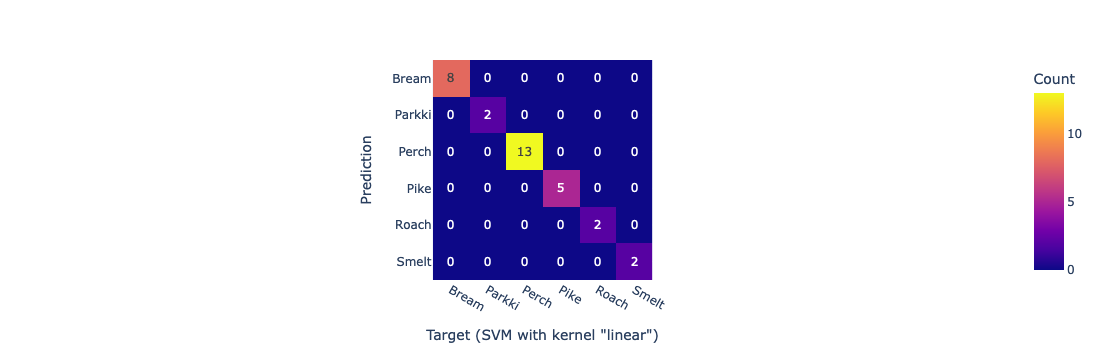

In [144]:
# 4. SVM
import plotly.express as px
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

best_model=grid_search_svm.best_estimator_
k = best_model.kernel

y_predict = best_model.predict(x_test)
y_svm_predict = y_predict

print(classification_report(y_predict, y_test))

# визуализируем
cm = confusion_matrix(y_test, y_predict)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(
    cm,
    text_auto=True,
    labels=dict(x="Predicted Class", y="True Class", color="Count"),
    x=class_names,
    y=class_names
)
fig.update_layout(xaxis_title=f'Target (SVM with kernel "{k}")', yaxis_title='Prediction')
# построена матрица ошибок – обученная модель предсказала правильно все объекты

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.00      0.00      0.00         1
           2       0.38      0.42      0.40        12
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.47        32
   macro avg       0.40      0.33      0.35        32
weighted avg       0.68      0.47      0.54        32



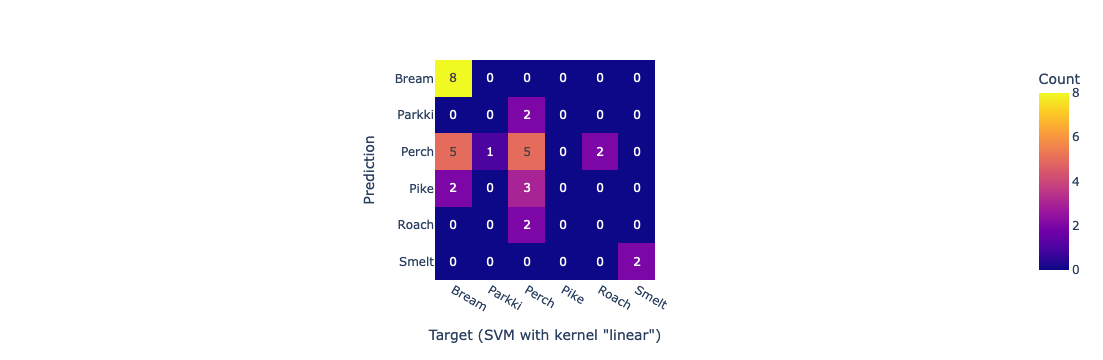

In [145]:
# 4. kNN
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# число соседей для перебора
n_neigh = np.arange(3, 10)

model_KNN = KNeighborsClassifier()
params = {'n_neighbors': n_neigh}

grid_search = GridSearchCV(estimator=model_KNN, param_grid = params, cv = 6)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_predict = best_model.predict(x_test)
y_knn_predict = y_predict

# визуализируем
print(classification_report(y_predict, y_test, zero_division=0))

cm = confusion_matrix(y_test, y_predict)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(
    cm,
    text_auto=True,
    labels=dict(x="Predicted Class", y="True Class", color="Count"),
    x=class_names,
    y=class_names
)
fig.update_layout(xaxis_title=f'Target (SVM with kernel "{k}")', yaxis_title='Prediction')
# построена матрица ошибок – обученная модель плохо справилась с предсказанием объектов

In [149]:
# 5. Сравнить результаты классификации, используя accuracy, precision,
# recall и f1-меру (можно использовать classification_report из
# sklearn.metrics). Сделать выводы.

print("Logistic Regression")
print(classification_report(y_logreg_predict, y_test))
print()
print("SVM")
print(classification_report(y_svm_predict, y_test))
print()
print("kNN")
print(classification_report(y_knn_predict, y_test, zero_division=0))

# На выбранном наборе данных Logistic Regression и SVM показали 100% точность классификации
# kNN же, как более простой метод, показал заметно меньшие метрики оценки качества классификации
# – показатели precision, recall и f1-score были равны 1 только в единственном случае
# в остальных случаях показатели могли быть вовсе равны,
# или были примерно равны 0.5:
# precision = 0.38 – было верно предсказано только 38%
# из реальных 100% объектов класса (precision = TP / All class objects)
# recall = 0.42 – было 58% ложных срабатываний (recall = TP / (TP + FN)
# f1-score (B = 1) = 0.4 – предпочтение ни точности, ни полноте
# "средне" между точностью и полнотой – 60%

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        3